## PREDICTING A PULSAR STAR

MODULE 5 FINAL PROJECT

* Student name: Ru Keïn
* Student pace: full time
* Scheduled project review date/time: Feb 11, 2020 @ 4 PM EST
* Instructor name: James Irving, PhD
* Blog post URL:

### `OVERVIEW`

*From Dr. Robert Lyon on Kaggle:*

HTRU2 is a data set which describes **a sample of pulsar candidates collected during the High Time Resolution Universe Survey.**

`Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.`

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).`

### `Attribute Information`
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class
HTRU 2 Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

### OUTLINE

    * IMPORT PACKAGES + LIBRARIES
    
    * OBTAIN DATA
    
    * PRE-PROCESSING
    
    * EDA + VISUALIZATIONS
    
    * MODELING:
        * MODEL 1: DECISION TREES
        * MODEL 2: XBOOST
        * MODEL 3: GRIDSEARCH CV
        
    * INTERPRET RESULTS
    
    * CONCLUSION + SUMMARY
    
    * FUTURE WORK


# IMPORT

In [61]:
# Import code packages and libraries
# FLATIRON BOOTCAMP Package Library
#!pip install -U fsds_100719
import fsds_100719 as fs
from fsds_100719.imports import * # will pre-load pd,np,plt,mpl,sns
%matplotlib inline

from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-bright')


font_dict={'family':'monospace',
          'size':14}
mpl.rc('font',**font_dict)

#ignore pink warnings
import warnings
warnings.filterwarnings('ignore')
# Allow for large # columns
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows','')



# OBTAIN

In [33]:
# OBTAIN data
df = pd.read_csv('pulsar_stars.csv')
df.head()

Mean of the integrated profile  ...  target_class
0                       140.562500  ...             0
1                       102.507812  ...             0
2                       103.015625  ...             0
3                       136.750000  ...             0
4                        88.726562  ...             0

[5 rows x 9 columns]

# SCRUB

In [34]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [35]:
# RENAMING COLUMNS
df = df.rename(columns={
    ' Mean of the integrated profile':'MEAN_IP',
    ' Standard deviation of the integrated profile':'STDEV_IP', 
    ' Excess kurtosis of the integrated profile':'KURTOSIS_IP', 
    ' Skewness of the integrated profile':'SKEWNESS_IP', 
    ' Mean of the DM-SNR curve':'MEAN_CURVE', 
    ' Standard deviation of the DM-SNR curve':'STDEV_CURVE', 
    ' Excess kurtosis of the DM-SNR curve':'KURTOSIS_CURVE',
    ' Skewness of the DM-SNR curve': 'SKEWNESS_CURVE',
    'target_class':'TARGET'})

In [36]:
# PRE-PROCESSING
df.describe()

MEAN_IP      STDEV_IP  ...  SKEWNESS_CURVE        TARGET
count  17898.000000  17898.000000  ...    17898.000000  17898.000000
mean     111.079968     46.549532  ...      104.857709      0.091574
std       25.652935      6.843189  ...      106.514540      0.288432
min        5.812500     24.772042  ...       -1.976976      0.000000
25%      100.929688     42.376018  ...       34.960504      0.000000
50%      115.078125     46.947479  ...       83.064556      0.000000
75%      127.085938     51.023202  ...      139.309331      0.000000
max      192.617188     98.778911  ...     1191.000837      1.000000

[8 rows x 9 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
MEAN_IP           17898 non-null float64
STDEV_IP          17898 non-null float64
KURTOSIS_IP       17898 non-null float64
SKEWNESS_IP       17898 non-null float64
MEAN_CURVE        17898 non-null float64
STDEV_CURVE       17898 non-null float64
KURTOSIS_CURVE    17898 non-null float64
SKEWNESS_CURVE    17898 non-null float64
TARGET            17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [38]:
# Check for null values
df.isna().sum()

MEAN_IP           0
STDEV_IP          0
KURTOSIS_IP       0
SKEWNESS_IP       0
MEAN_CURVE        0
STDEV_CURVE       0
KURTOSIS_CURVE    0
SKEWNESS_CURVE    0
TARGET            0
dtype: int64

# EXPLORE

Exploratory Data Analysis (EDA)

In [39]:
df.shape

(17898, 9)

In [40]:
df['TARGET'].value_counts()

0    16259
1     1639
Name: TARGET, dtype: int64

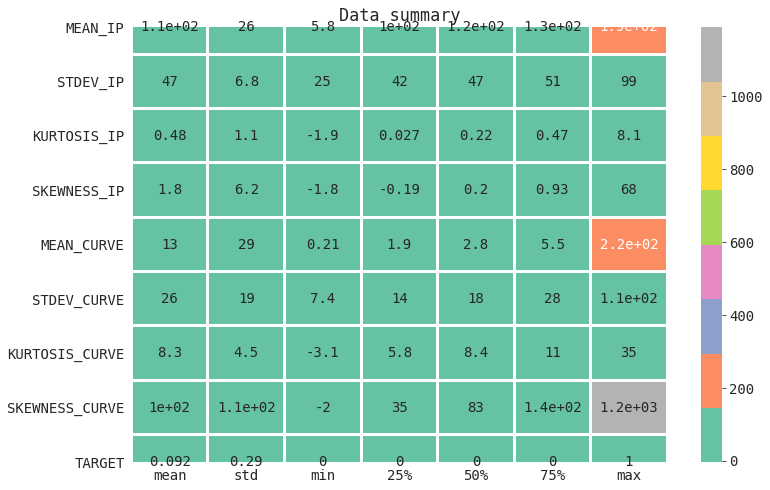

In [173]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

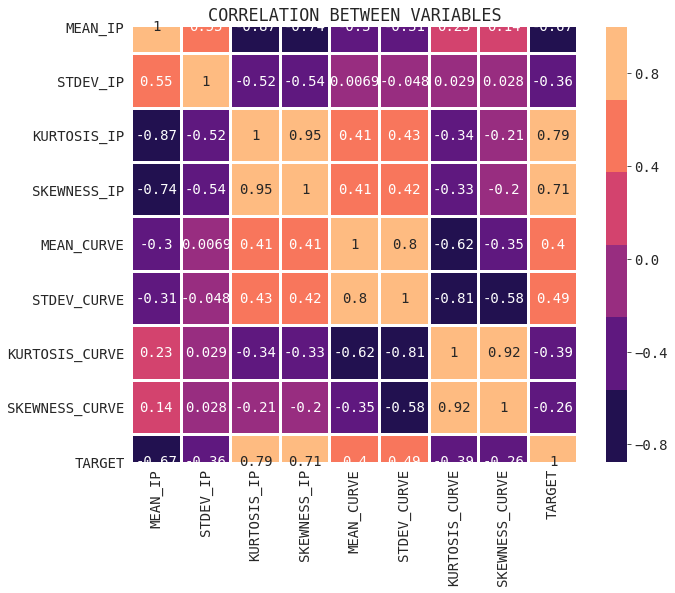

In [174]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

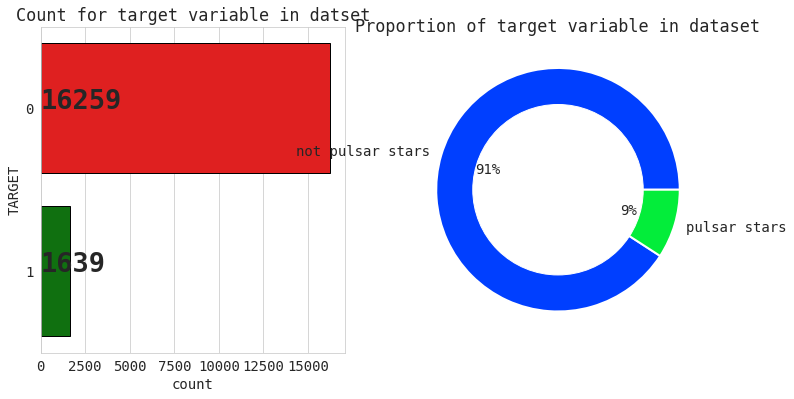

In [175]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = df["TARGET"],
                   palette=["r","g"],
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(df["TARGET"].value_counts().values,
        labels=["not pulsar stars","pulsar stars"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

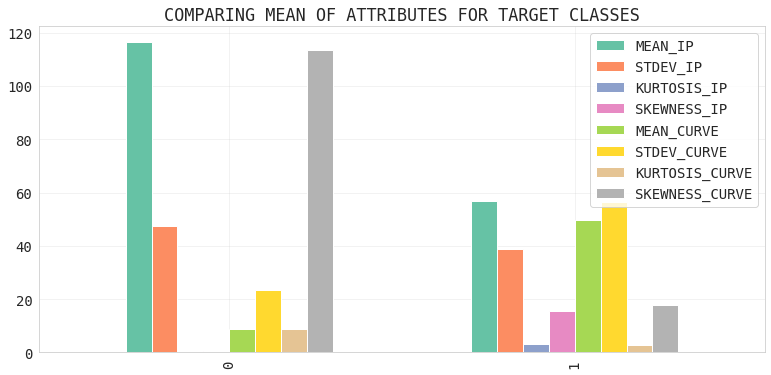

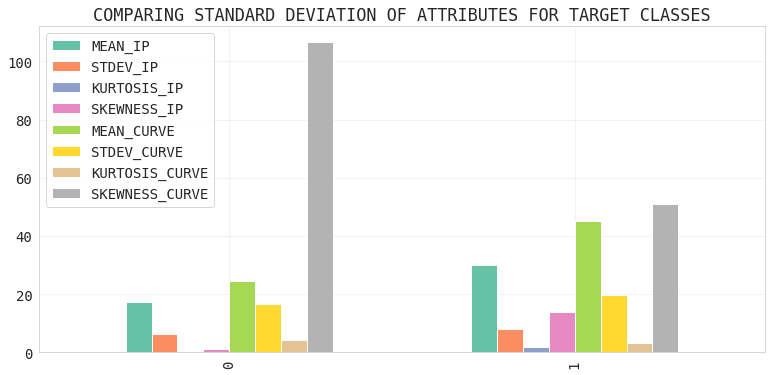

In [176]:
compare = df.groupby('TARGET')[['MEAN_IP', 'STDEV_IP', 'KURTOSIS_IP', 'SKEWNESS_IP',
                                        'MEAN_CURVE', 'STDEV_CURVE', 'KURTOSIS_CURVE',
                                        'SKEWNESS_CURVE']].mean().reset_index()


compare = compare.drop('TARGET', axis=1)

compare.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare1 = df.groupby('TARGET')[['MEAN_IP', 'STDEV_IP', 'KURTOSIS_IP', 'SKEWNESS_IP',
                                        'MEAN_CURVE', 'STDEV_CURVE', 'KURTOSIS_CURVE',
                                        'SKEWNESS_CURVE']].std().reset_index()
compare1 = compare1.drop('TARGET',axis=1)
compare1.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.show()

[GREEN == STAR , RED == NOTSTAR]


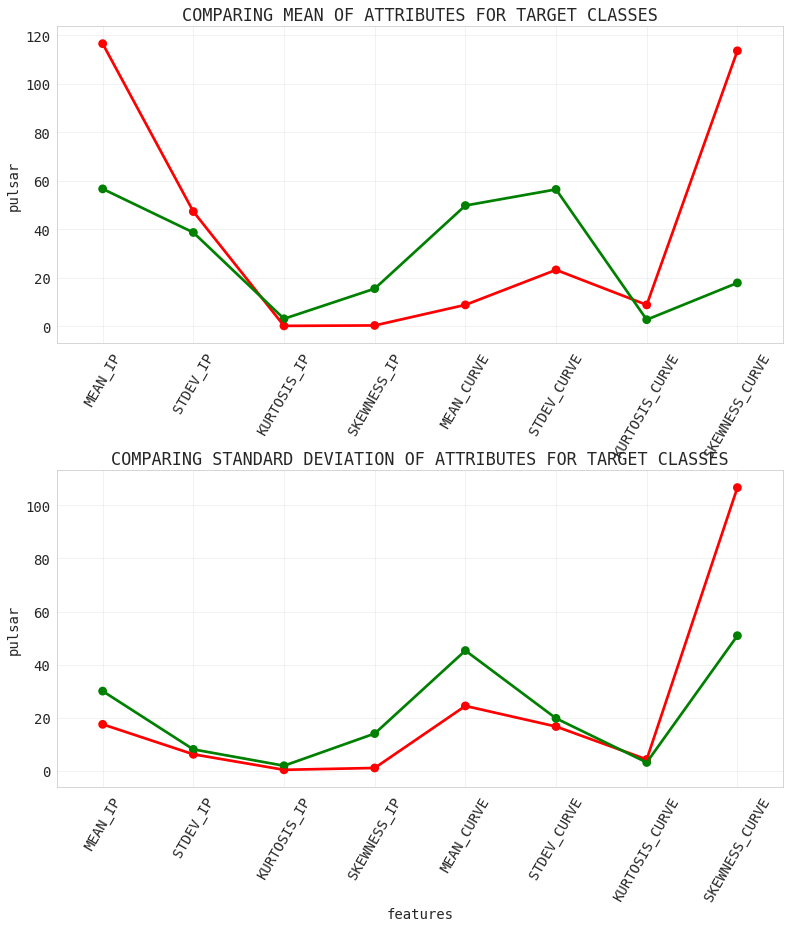

In [177]:
compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"not_pulsar", 1:"pulsar"})
plt.figure(figsize=(13,14))
plt.subplot(211)
sns.pointplot(x= "features",y="not_pulsar",data=compare_mean,color="r")
sns.pointplot(x= "features",y="pulsar",data=compare_mean,color="g")
plt.xticks(rotation =60)
plt.xlabel("")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"not_pulsar", 1:"pulsar"})
plt.subplot(212)
sns.pointplot(x= "features",y="not_pulsar",data=compare_std,color="r")
sns.pointplot(x= "features",y="pulsar",data=compare_std,color="g")
plt.xticks(rotation =60)
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(hspace =.4)
print ("[GREEN == STAR , RED == NOTSTAR]")
plt.show()

***************************************
DISTIBUTION OF VARIABLES IN DATA SET
***************************************


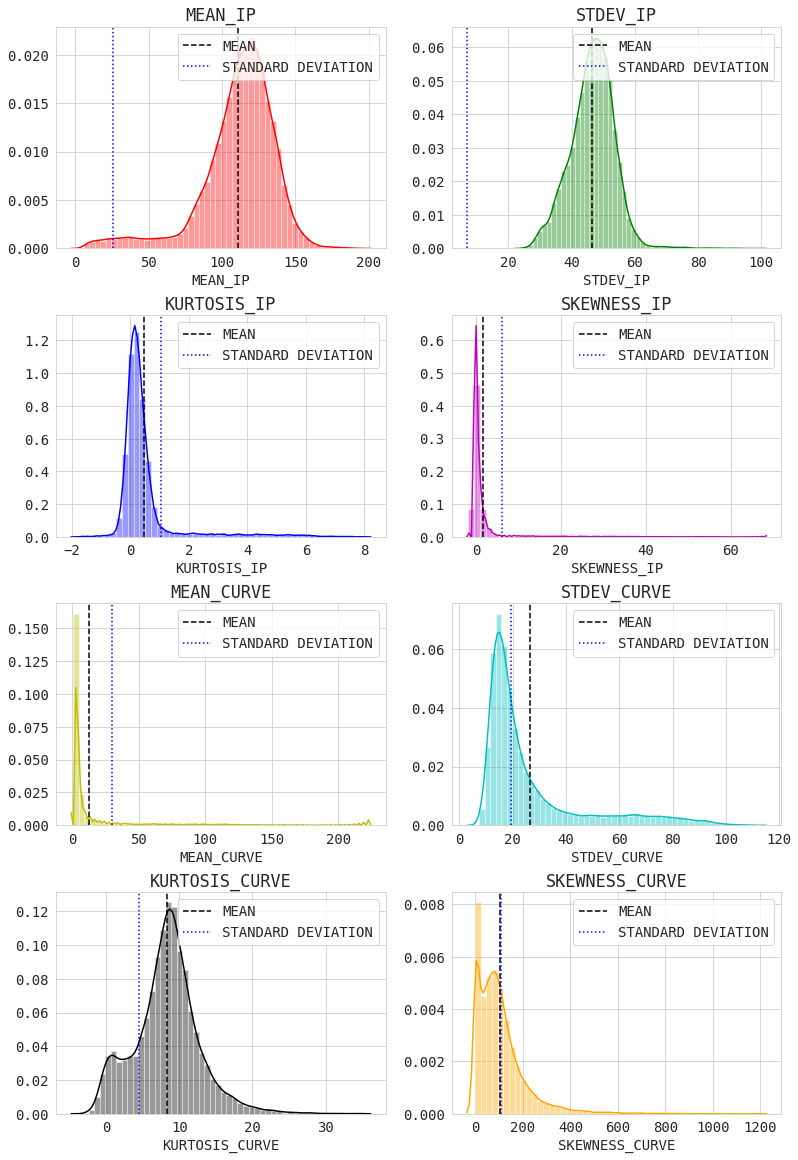

In [180]:
import itertools
columns = ['MEAN_IP', 'STDEV_IP', 'KURTOSIS_IP', 'SKEWNESS_IP',
                                        'MEAN_CURVE', 'STDEV_CURVE', 'KURTOSIS_CURVE',
                                        'SKEWNESS_CURVE']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(df[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    
print ("***************************************")
print ("DISTIBUTION OF VARIABLES IN DATA SET")
print ("***************************************")

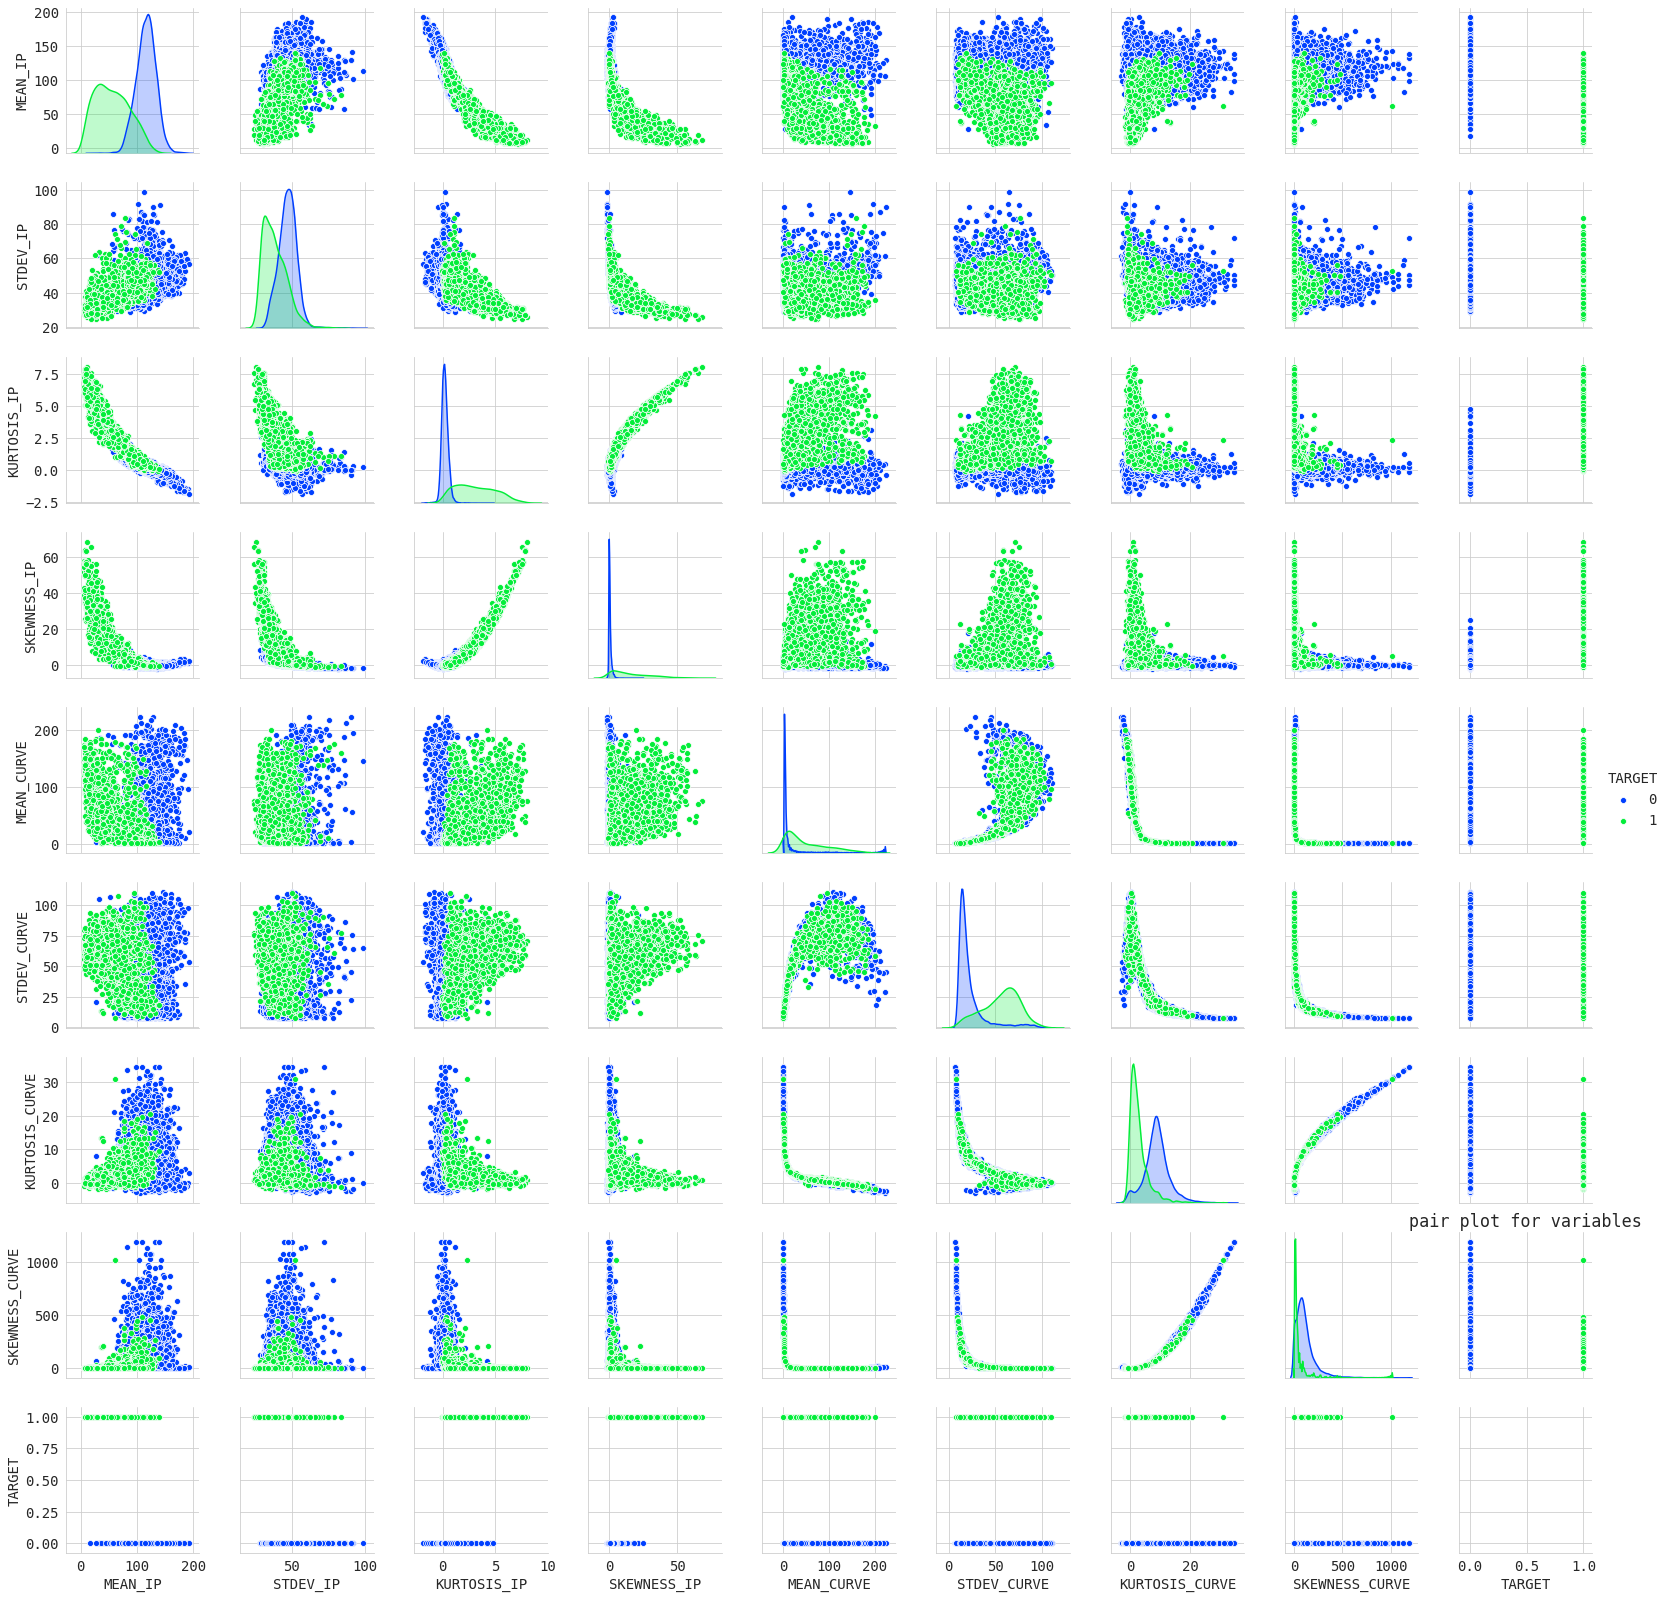

In [181]:
sns.pairplot(df,hue="TARGET")
plt.title("pair plot for variables")
plt.show()

In [41]:
df.columns

Index(['MEAN_IP', 'STDEV_IP', 'KURTOSIS_IP', 'SKEWNESS_IP', 'MEAN_CURVE',
       'STDEV_CURVE', 'KURTOSIS_CURVE', 'SKEWNESS_CURVE', 'TARGET'],
      dtype='object')

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=data[data["target_class"] == 1],alpha=.7,
            label="pulsar stars",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=data[data["target_class"] == 0],alpha=.6,
            label="not pulsar stars",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.axvline(data[data["target_class"] == 1]["kurtosis_profile"].mean(),
            color = "g",linestyle="dashed",label="mean pulsar star")
plt.axvline(data[data["target_class"] == 0]["kurtosis_profile"].mean(),
            color = "r",linestyle="dashed",label ="mean non pulsar star")
plt.axhline(data[data["target_class"] == 1]["skewness_profile"].mean(),
            color = "g",linestyle="dashed")
plt.axhline(data[data["target_class"] == 0]["skewness_profile"].mean(),
            color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("kurtosis profile")
plt.ylabel("skewness profile")
plt.title("Scatter plot for skewness and kurtosis for target classes")
plt.subplot(122)
plt.scatter(x = "skewness_dmsnr_curve",y = 'kurtosis_dmsnr_curve',
            data=data[data["target_class"] == 0],alpha=.7,
            label="not pulsar stars",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.scatter(x = "skewness_dmsnr_curve",y = 'kurtosis_dmsnr_curve',
            data=data[data["target_class"] == 1],alpha=.7,
            label="pulsar stars",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.axvline(data[data["target_class"] == 1]["kurtosis_dmsnr_curve"].mean(),
            color = "g",linestyle="dashed",label ="mean pulsar star")
plt.axvline(data[data["target_class"] == 0]["kurtosis_dmsnr_curve"].mean(),
            color = "r",linestyle="dashed",label ="mean non pulsar star")
plt.axhline(data[data["target_class"] == 1]["skewness_dmsnr_curve"].mean(),
            color = "g",linestyle="dashed")
plt.axhline(data[data["target_class"] == 0]["skewness_dmsnr_curve"].mean(),
            color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("skewness_dmsnr_curve")
plt.ylabel('kurtosis_dmsnr_curve')
plt.title("||Scatter plot for skewness and kurtosis of dmsnr_curve for target classes")
plt.subplots_adjust(wspace =.4)

In [ ]:
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=data["target_class"],y=data[i],palette=["orangered","lime"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(data[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")
    
print ("****************************************************")
print ("BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS")
print ("****************************************************")

In [ ]:
st = data[data["target_class"] == 1].reset_index()
nst= data[data["target_class"] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()

plt.figure(figsize=(13,10))
plt.stackplot(new.index,new["mean_profile"],
              alpha =.5,color="b",labels=["mean_profile"])
plt.stackplot(new.index,new["std_profile"],
              alpha=.5,color="r",labels=["std_profile"])
plt.stackplot(new.index,new["skewness_profile"],
              alpha=.5,color ="g",labels=["skewness_profile"])
plt.stackplot(new.index,new["kurtosis_profile"],
              alpha=.5,color = "m",labels=["kurtosis_profile"])
plt.axvline(x=16259,color = "black",linestyle="dashed",
            label = "separating pulsars vs non pulsars")
plt.axhline(new["mean_profile"].mean(),color = "b",
            linestyle="dashed",label = "average mean profile")
plt.axhline(new["std_profile"].mean(),color = "r",
            linestyle="dashed",label = "average std profile")
plt.axhline(new["skewness_profile"].mean(),color = "g",
            linestyle="dashed",label = "average skewness profile")
plt.axhline(new["kurtosis_profile"].mean(),color = "m",
            linestyle="dashed",label = "average kurtosis profile")
plt.legend(loc="best")
plt.title("Area plot for attributes for pulsar stars vs non pulsar stars")
plt.show()

In [ ]:
plt.stackplot(new.index,new["mean_dmsnr_curve"],
              color="b",alpha=.5,labels=["mean_dmsnr_curve"])
plt.stackplot(new.index,new["std_dmsnr_curve"],
              color="r",alpha=.5,labels=["std_dmsnr_curve"])
plt.stackplot(new.index,new["skewness_dmsnr_curve"],color="g",
              alpha=.5,labels=["skewness_dmsnr_curve"])
plt.stackplot(new.index,new["kurtosis_dmsnr_curve"],color="m",
              alpha=.5,labels=["kurtosis_dmsnr_curve"])
plt.axvline(x=16259,color = "black",linestyle="dashed",
            label = "separating pulsars vs non pulsars")
plt.axhline(new["mean_dmsnr_curve"].mean(),color = "b",linestyle="dashed",
            label = "average mean dmsnr_curve")
plt.axhline(new["std_dmsnr_curve"].mean(),color = "r",
            linestyle="dashed",label = "average std dmsnr_curve")
plt.axhline(new["skewness_dmsnr_curve"].mean(),color = "g",
            linestyle="dashed",label = "average skewness dmsnr_curve")
plt.axhline(new["kurtosis_dmsnr_curve"].mean(),color = "m",
            linestyle="dashed",label = "average kurtosis dmsnr_curve")
plt.legend(loc="best")
plt.title("Area plot for dmsnr_curve attributes for pulsar stars vs non pulsar stars")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["target_class"] == 1][["mean_profile"]],data[data["target_class"] == 1][["std_profile"]],data[data["target_class"] == 1][["skewness_dmsnr_curve"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="Pulsar star")
ax.scatter(data[data["target_class"] == 0][["mean_profile"]],data[data["target_class"] == 0][["std_profile"]],data[data["target_class"] == 0][["skewness_dmsnr_curve"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label=" NotPulsar star")

ax.set_xlabel("mean_profile",fontsize=15)
ax.set_ylabel("std_profile",fontsize=15)
ax.set_zlabel("skewness_dmsnr_curve",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("w")
plt.title("3D PLOT FOR MEAN_PROFILE VS STD_PROFILE VS SKEWNESS_DMSNR_CURVE",fontsize=10)
plt.show()

In [ ]:
sns.jointplot(data["mean_profile"],data["std_profile"],kind="kde",scale=10)
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.scatter(st["mean_profile"],st["std_profile"],alpha=.5,
            s=st["skewness_profile"]*3,linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_profile"],nst["std_profile"],alpha=.5,
            s=nst["skewness_profile"]*3,linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_profile")
plt.ylabel("std_profile")
plt.title("Bubble plot for mean,std and skewness")


plt.subplot(122)
plt.scatter(st["mean_profile"],st["std_profile"],alpha=.5,
            s=st["kurtosis_profile"]*5,linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_profile"],nst["std_profile"],alpha=.5,
            s=nst["kurtosis_profile"]*5,linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_profile")
plt.ylabel("std_profile")
plt.title("Bubble plot for mean,std and kurtosis")
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.scatter(st["mean_dmsnr_curve"],st["std_dmsnr_curve"],
            alpha=.5,s=st["skewness_dmsnr_curve"],linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_dmsnr_curve"],nst["std_dmsnr_curve"],
            alpha=.5,s=nst["skewness_dmsnr_curve"],linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_dmsnr_curve")
plt.ylabel("std_dmsnr_curve")
plt.title("Bubble plot for mean,std and skewness of dmsnr_curve")

plt.subplot(122)
plt.scatter(st["mean_dmsnr_curve"],st["std_dmsnr_curve"],
            alpha=.5,s=st["kurtosis_dmsnr_curve"],linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_dmsnr_curve"],nst["std_dmsnr_curve"],
            alpha=.5,s=nst["kurtosis_dmsnr_curve"],linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_dmsnr_curve")
plt.ylabel("std_dmsnr_curve")
plt.title("Bubble plot for mean,std and kurtosis of dmsnr_curve")
plt.show()

In [ ]:
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)

plt.figure(figsize=(13,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["target_class"],y=data[i],
                   palette=["Orangered","lime"],alpha=.5)
    plt.title(i)

In [ ]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(14,8))
parallel_coordinates(data,"target_class",alpha=.5)
plt.show()

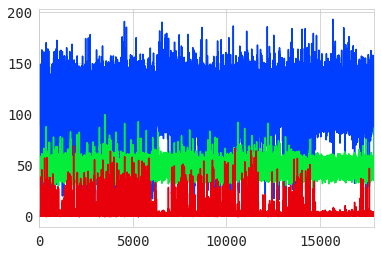

In [62]:
df['MEAN_IP'].plot()
df['STDEV_IP'].plot()
df['SKEWNESS_IP'].plot()

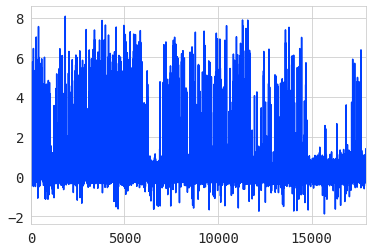

In [63]:
# EDA + VISUALIZATIONS
df['KURTOSIS_IP'].plot()


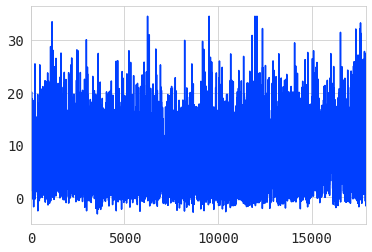

In [64]:
df['KURTOSIS_CURVE'].plot()

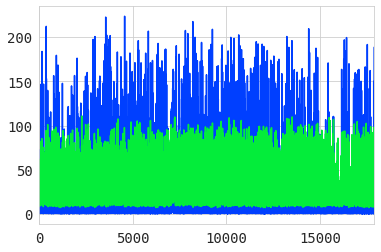

In [65]:
df['MEAN_CURVE'].plot()
df['STDEV_CURVE'].plot()

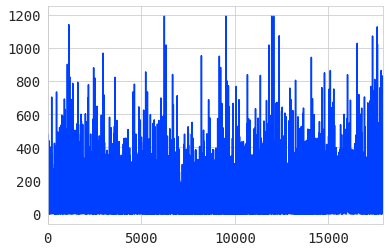

In [66]:
df['SKEWNESS_CURVE'].plot()

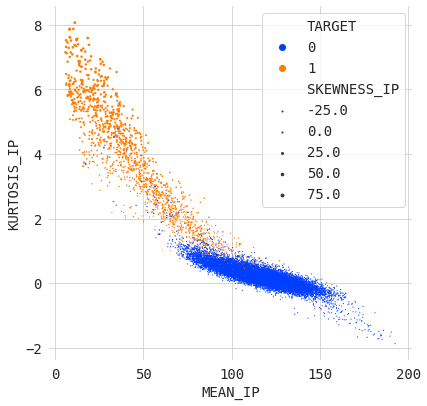

In [67]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='MEAN_IP', y='KURTOSIS_IP',
                hue='TARGET', size='SKEWNESS_IP',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)


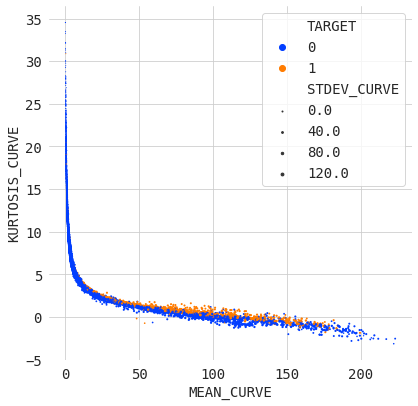

In [68]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='MEAN_CURVE', y='KURTOSIS_CURVE',
                hue='TARGET', size='STDEV_CURVE',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

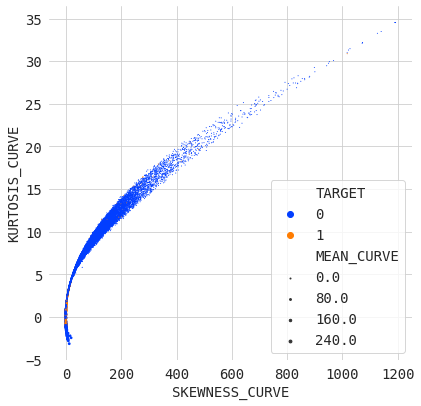

In [69]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='SKEWNESS_CURVE', y='KURTOSIS_CURVE',
                hue='TARGET', size='MEAN_CURVE',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

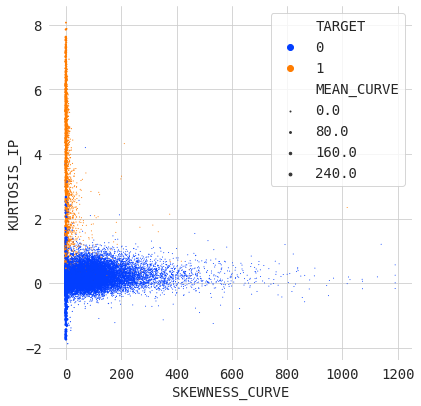

In [70]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='SKEWNESS_CURVE', y='KURTOSIS_IP',
                hue='TARGET', size='MEAN_CURVE',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

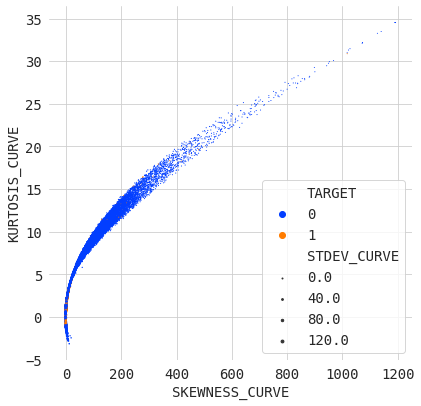

In [71]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='SKEWNESS_CURVE', y='KURTOSIS_CURVE',
                hue='TARGET', size='STDEV_CURVE',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

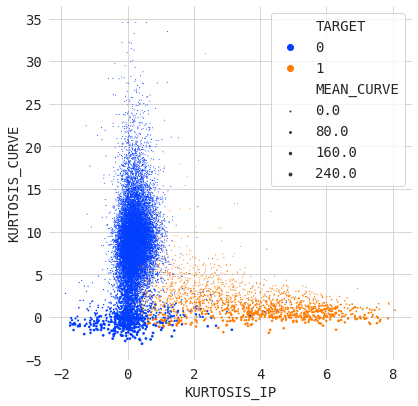

In [72]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='KURTOSIS_IP', y='KURTOSIS_CURVE',
                hue='TARGET', size='MEAN_CURVE',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

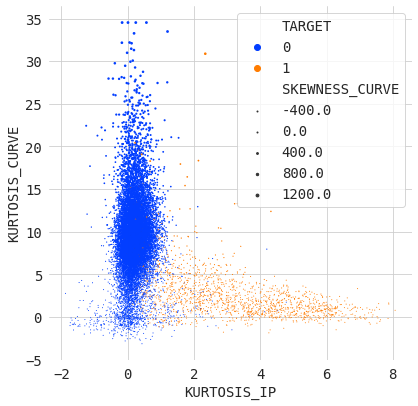

In [73]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='KURTOSIS_IP', y='KURTOSIS_CURVE',
                hue='TARGET', size='SKEWNESS_CURVE',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

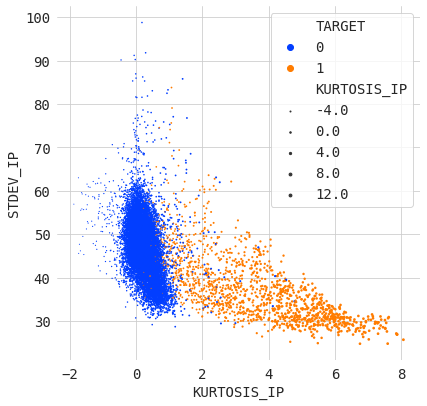

In [74]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='KURTOSIS_IP', y='STDEV_IP',
                hue='TARGET', size='KURTOSIS_IP',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

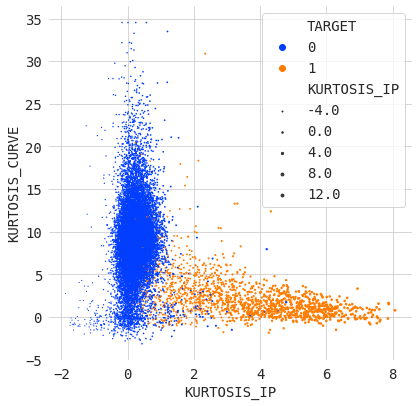

In [75]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='KURTOSIS_IP', y='KURTOSIS_CURVE',
                hue='TARGET', size='KURTOSIS_IP',
                palette='bright',
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

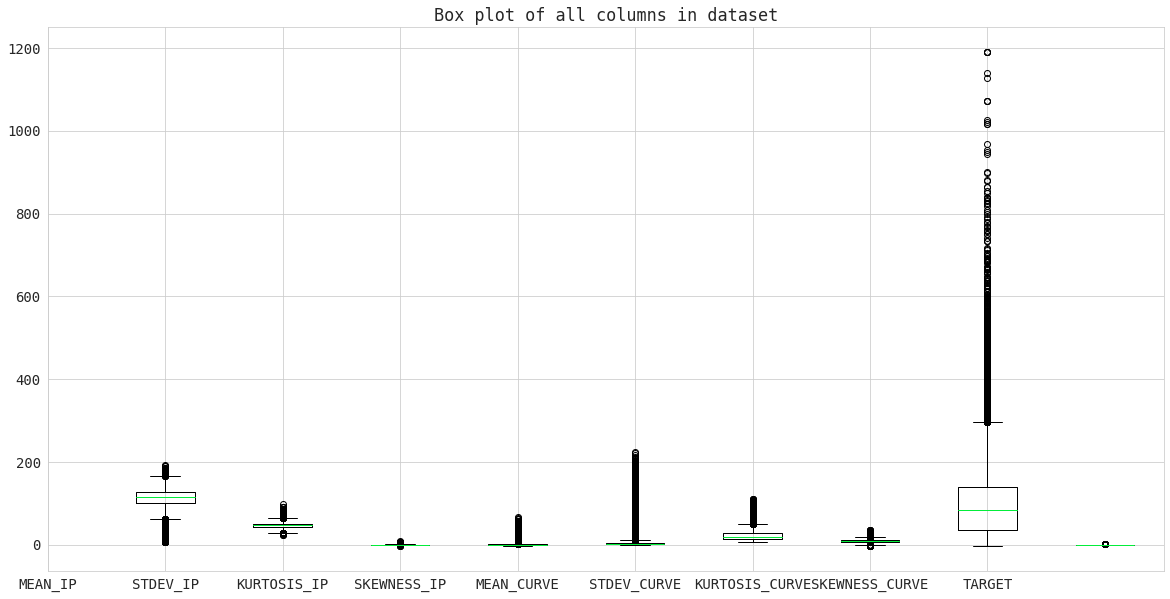

In [76]:
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()

# MODEL 1: Decision Tree

Create features, labels, training, and test data

In [96]:
# create our feature set X and labels y:

y = df['TARGET']
X = df.drop(columns=['TARGET']).copy()


In [97]:
display(y.shape, X.shape)

(17898,)

(17898, 8)

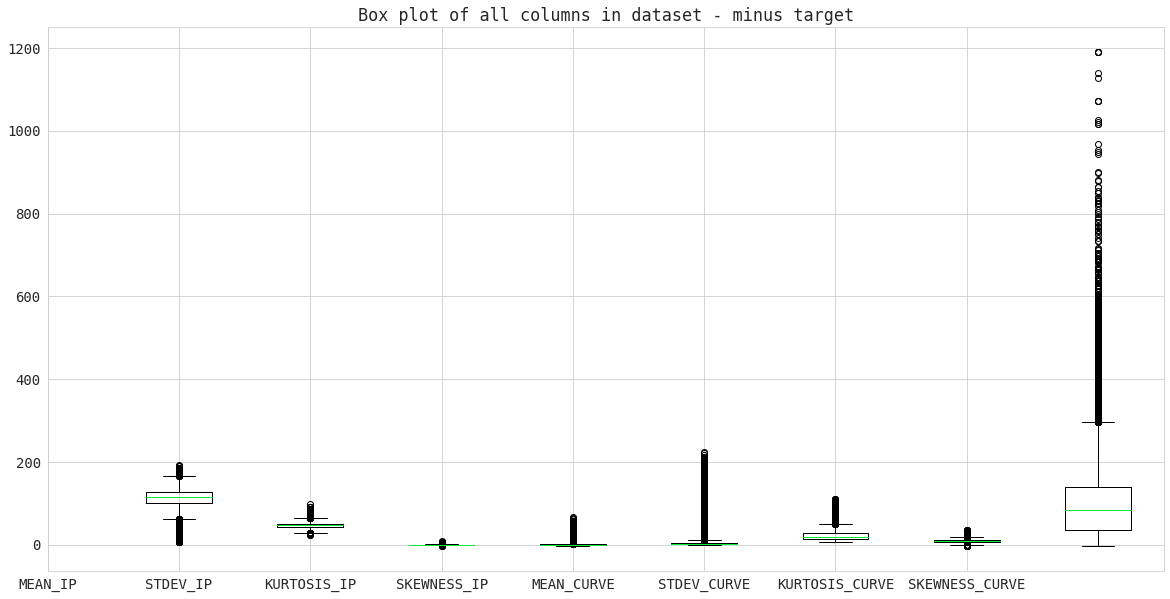

In [98]:
plt.figure(figsize=(20, 10))
plt.boxplot([X[col] for col in X.columns])
plt.title("Box plot of all columns in dataset - minus target")
plt.xticks(range(len(X.columns.values)), X.columns.values)
plt.show()

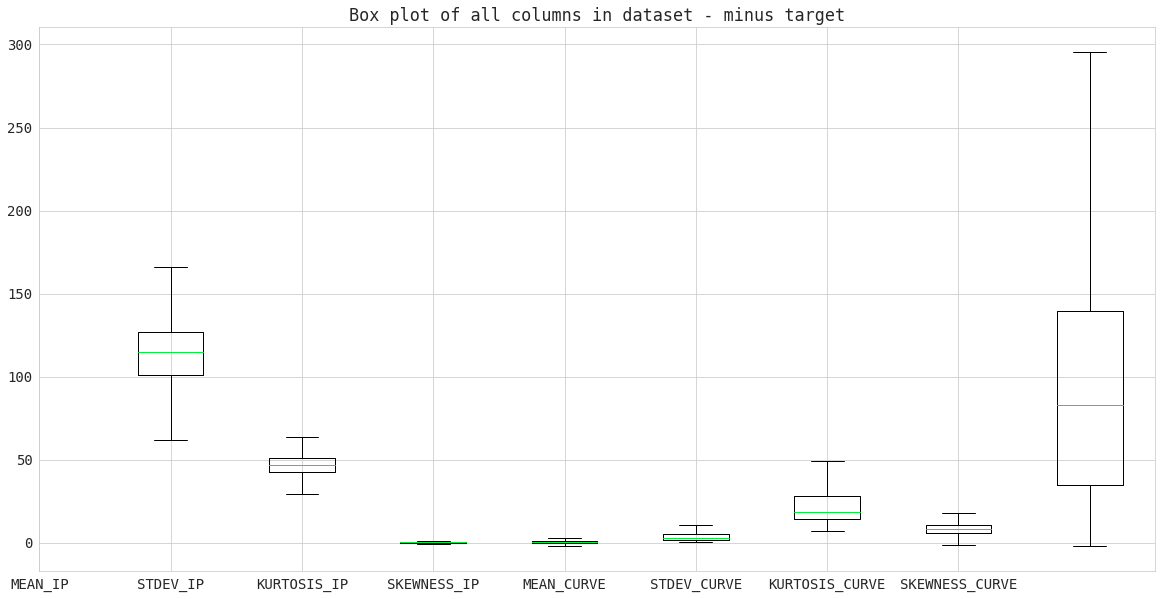

In [99]:
plt.figure(figsize=(20, 10))
plt.boxplot([X[col] for col in X.columns], showfliers=False)
plt.title("Box plot of all columns in dataset - minus target")
plt.xticks(range(len(X.columns.values)), X.columns.values)
plt.show()

In [100]:
# We'll do a 75/25 split on the dataset for training/test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [101]:
# import additional libraries for decision tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

## Create instance

In [102]:
## Create an instance of decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

## Fit data to model

In [103]:
# Fit the training data to the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## DOT graph

In [85]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Make predictions

In [104]:
# Make predictions for test data
y_pred = clf.predict(X_test)

## Evaluate Model

### Check accuracy

In [105]:
# Check the accuracy, AUC, and create a confusion matrix

# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :97.40782122905028


### AUC

In [106]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))



AUC is :0.92


### Confusion matrix

In [107]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted     0    1   All
True                      
0          3998   53  4051
1            63  361   424
All        4061  414  4475

In [108]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[3998   53]
 [  63  361]]


In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[0.98691681 0.01308319]
 [0.14858491 0.85141509]]


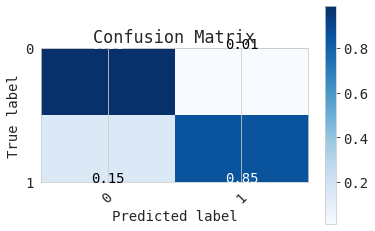

In [110]:
# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=set(y), normalize=True,
                      title='Normalized confusion matrix')

### Interpret results

96.7% Accuracy is pretty good, but let's do some parameter tuning.

## Parameter Tuning
    
    * Create an array for max_depth values ranging from 1 - 32
    * In a loop, train the classifier for each depth value (32 runs) 
    * Calculate the training and test AUC for each run
    * Plot a graph to show under/over fitting and optimal value
    * Interpret the results

### Max Depth

In [111]:
# Check for the best depth parameter
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

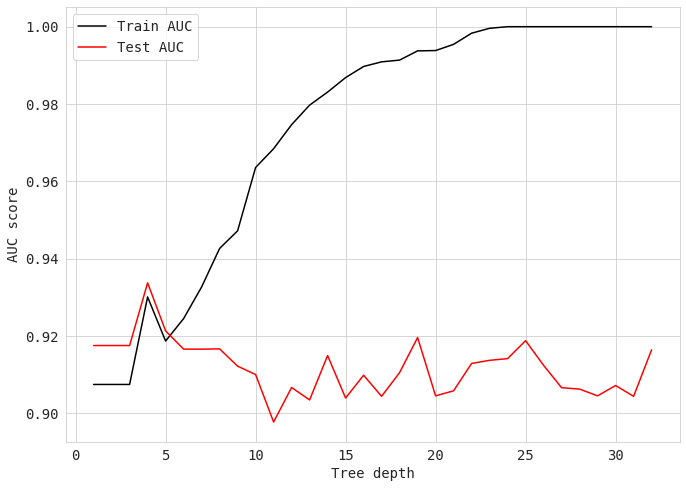

In [112]:
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(11,8))
plt.plot(max_depths, train_results, 'k', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

    * Optimal value seen here is 4

### Min Sample Split

Now we'll check for the best min_samples_splits parameter for our decision tree.

    * Create an array for min_sample_splits values ranging from 0.1 - 1 with an 
    increment of 0.1
    * In a loop, train the classifier for each min_samples_splits value (10 runs)
    * Calculate the training and test AUC for each run
    * Plot a graph to show under/over fitting and optimal value
    * Interpret the results

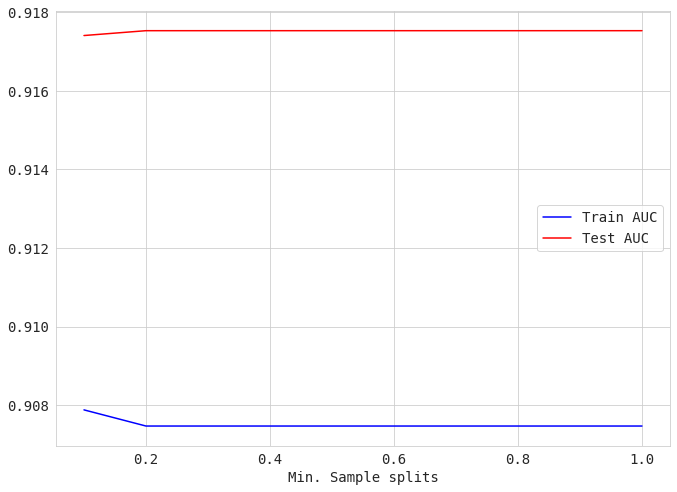

In [113]:
# Identify the optimal min-samples-split for given data

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(11,8))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

    AUC for train and test data stabilizes at 0.2, with a high of 0.1
    Further increase in minimum sample split does not improve learning.


### Minimum Sample Leafs
Now we'll check for the best min_samples_leafs parameter value for our decision tree.

    * Create an array for min_samples_leafs values ranging from 0.1 - 0.5 
    with an increment of 0.1
    * In a loop, train the classifier for each min_samples_leafs value (5 runs)
    * Calculate the training and test AUC for each run
    * Plot a graph to show under/over fitting and optimal value
    * Interpret the results

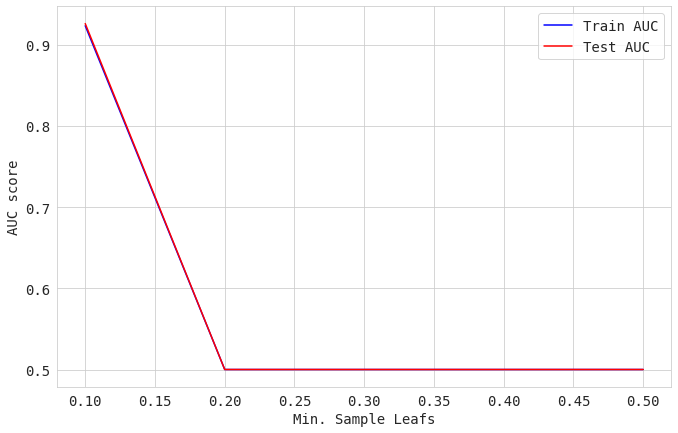

In [114]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(11,7))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

    AUC gives best of 0.1 for both test and training sets.

    The accuracy drops down if we continue to increase the parameter value.

### Maximum Features

Now we'll check for the best max_features parameter value for our decision tree.

    * Create an array for max_features values ranging from 1 - 12 (1 features vs all)
    * In a loop, train the classifier for each max_features value (12 runs)
    * Calculate the training and test AUC for each run
    * Plot a graph to show under/over fitting and optimal value
    * Interpret the results

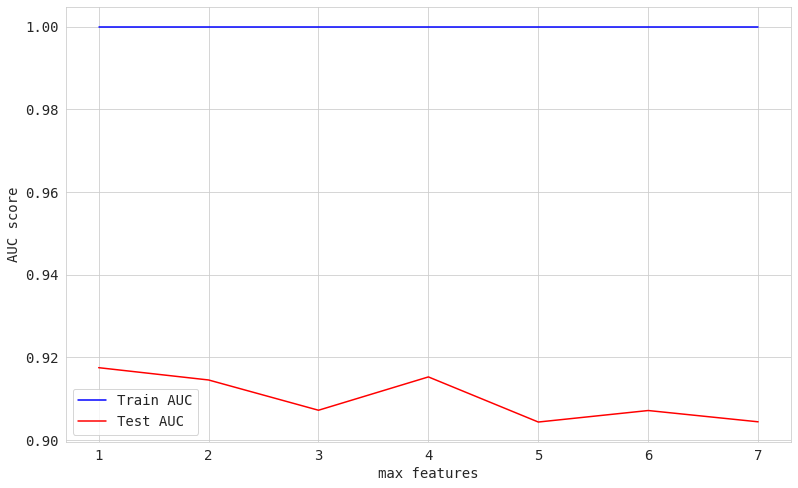

In [115]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(13,8))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

    No clear effect on the training dataset - flat AUC.

    Some fluctuations in test AUC but not definitive enough to make a judgment

    Highest AUC value seen at 1.

## Retrain classifer

We'll now use the best values from each training phase above and feed it back to our classifier and see if have any improvement in predictive performance.

    * Train the classifier with optimal values identified
    * Compare the AUC with vanilla DT AUC
    * Interpret the results of comparison

In [116]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=3,
                           max_depth=4,
                           min_samples_split=0.1,
                           min_samples_leaf=0.1)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9044112681238734

## DOT graph

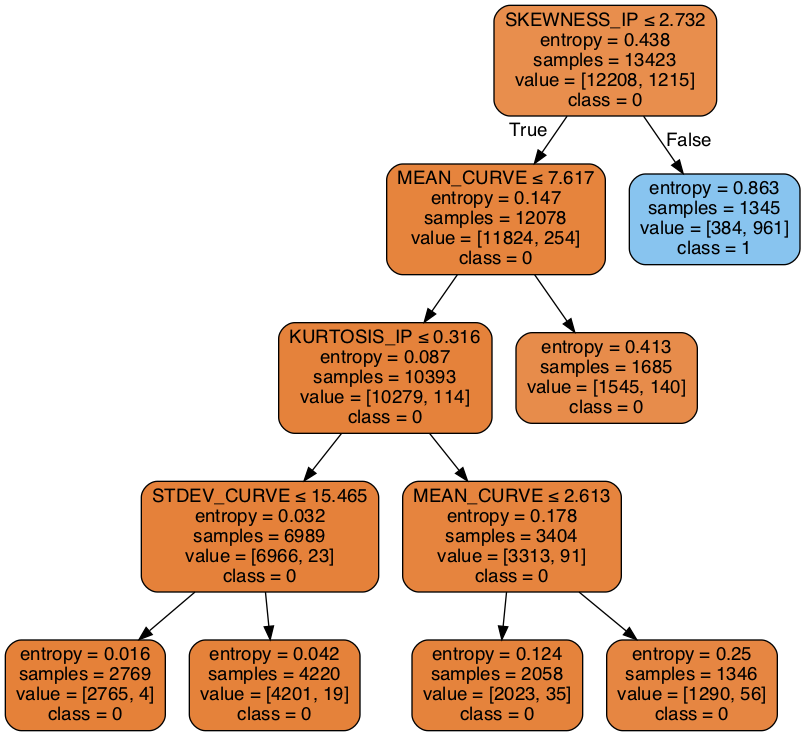

In [117]:
# Create DOT data
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Unfortunately, our model still suffers from overfitting due to class imbalances.

Let's apply SMOTE to balance the classes and try a random forest.

# MODEL 2: Random Forest

## SMOTE

In [119]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE, ADASYN

Using TensorFlow backend.


In [120]:
# Previous original class distribution
print(y_train.value_counts())
# Resampled
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)


# Preview synthetic sample class distribution
print('---------------------------------')
print(pd.Series(y_resampled).value_counts()) 

0    12208
1     1215
Name: TARGET, dtype: int64
---------------------------------
1    12208
0    12208
Name: TARGET, dtype: int64


In [121]:
# Split resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)


In [122]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

----------------------------------------------
AUC for 0.005: 0.9419958873634151
----------------------------------------------
AUC for 0.1: 0.9419958873634151
----------------------------------------------
AUC for 0.2: 0.9419958873634151
----------------------------------------------
AUC for 0.3: 0.94215686611422
----------------------------------------------
AUC for 0.5: 0.9419958873634151
----------------------------------------------
AUC for 0.6: 0.94215686611422
----------------------------------------------
AUC for 0.7: 0.9419958873634151
----------------------------------------------
AUC for 0.8: 0.94215686611422


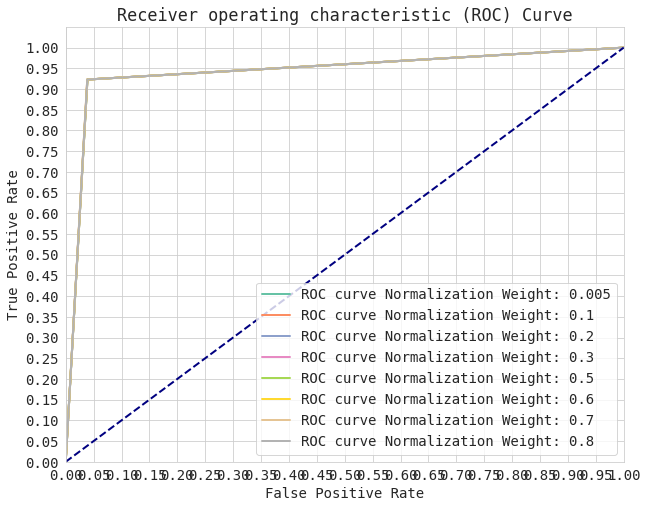

In [135]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    # Instantiate and fit a DecisionTreeClassifier
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
    model_tree = tree_clf.fit(X_train, y_train)

    # Predict
    y_pred = tree_clf.predict(X_test)

    y_score = accuracy_score(y_test,y_pred)

    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    #roc_auc = auc(fpr, tpr)
    print('----------------------------------------------')
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [136]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.00569733, 0.94461162, 0.        , 0.        ,
       0.01403391, 0.        , 0.03565714])

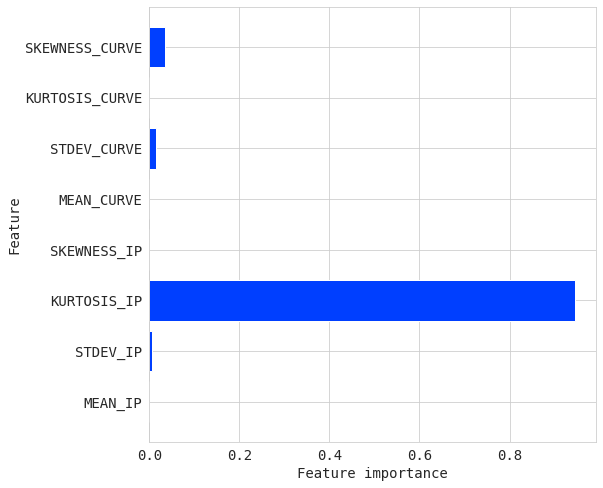

In [138]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [139]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2931  175]
 [ 216 2782]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3106
           1       0.94      0.93      0.93      2998

    accuracy                           0.94      6104
   macro avg       0.94      0.94      0.94      6104
weighted avg       0.94      0.94      0.94      6104



In [140]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 93.59%


In [141]:
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3), 
                               n_estimators=20)

In [142]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [143]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.9435342944517257

In [144]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.9387287024901704

In [146]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=3)

In [147]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
# Training accuracy score
forest.score(X_train, y_train)

0.939438619484491

In [149]:
# Test accuracy score
forest.score(X_test, y_test)

0.9341415465268676

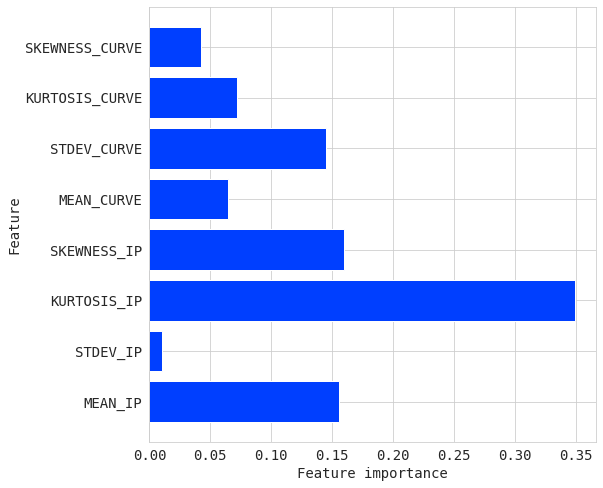

In [150]:
plot_feature_importances(forest)

In [151]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators=5, max_features=8, max_depth=2)

In [152]:
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [153]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

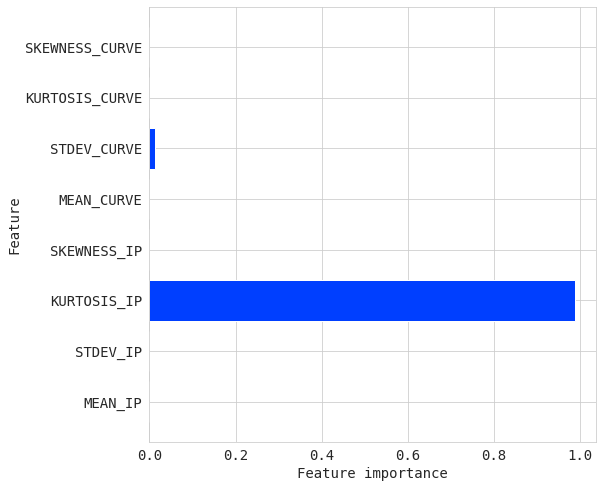

In [154]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [155]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

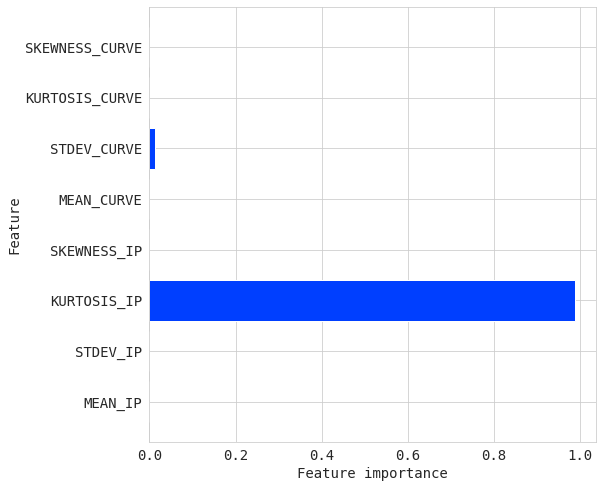

In [156]:
# Feature importance
plot_feature_importances(rf_tree_2)

In [157]:
rf_clf1 = RandomForestClassifier(class_weight='balanced')
rf_clf1.fit(X_train, y_train)
rf_clf1.score(X_train, y_train)

1.0

In [158]:
# First tree from balanced rf_clf1
rf_tree_1 = rf_clf1.estimators_[0]

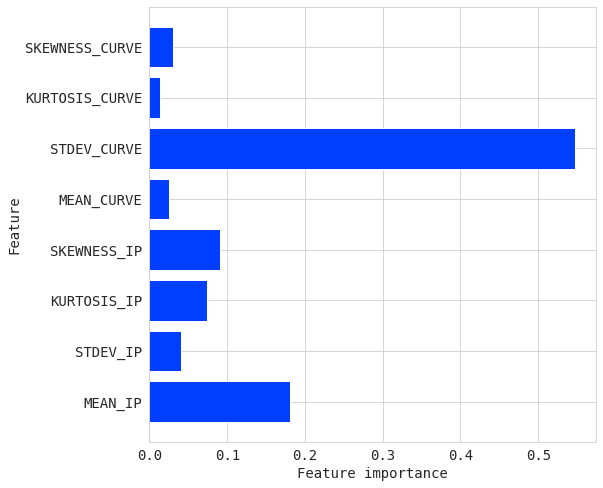

In [159]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [160]:
# First tree from balanced rf_clf1
rf_tree_2 = rf_clf1.estimators_[1]

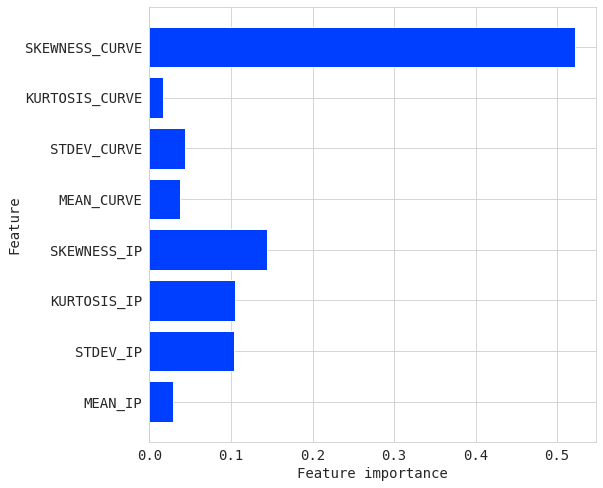

In [161]:
# Feature importance
plot_feature_importances(rf_tree_2)

# MODEL 3: XGBOOST

In [10]:
# MODEL 2: XGBOOST

In [ ]:

import xgboost as xgb
from xgboost import plot_importance, plot_tree
reg= xgb.XGBRegressor(n_estimators=500)

# MODEL 4: GRIDSEARCH

In [162]:
# MODEL 3: GRIDSEARCH CV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [163]:
dt_clf = DecisionTreeClassifier(class_weight='balanced')
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 95.41%


In [164]:
dt_param_grid = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2,3,4,5,6],
                 'min_samples_split': [2,5,10],
                 'min_samples_leaf':[1,2,3,4,5,6]
}

In [165]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [166]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [167]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 95.06%
Mean Test Score: 95.94%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

## Gridsearch RF

In [169]:
rf_clf = RandomForestClassifier(class_weight='balanced')
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 97.07%


In [170]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [171]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 96.73%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [172]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.9593709043250328
Random forest grid search:  0.971821756225426


In [12]:
# INTERPRET RESULTS

In [13]:
# CONCLUSION + SUMMARY

In [ ]:
# FUTURE WORK